In [1]:
import os
os.chdir('../src/')
from twitter_scraper import settings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

users_df = pd.read_csv(settings.USERS_CSV)
nodes_df = pd.read_csv(settings.NODES_CSV)
tweets_df = pd.read_csv(settings.TWEETS_CSV, low_memory=False)
edges_df = pd.read_csv(settings.EDGES_FOLLOWERS_CSV)

In [3]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31518 entries, 0 to 31517
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           31518 non-null  int64 
 1   user_id_str       31518 non-null  int64 
 2   name              31514 non-null  object
 3   screen_name       31518 non-null  object
 4   location          31518 non-null  object
 5   description       23312 non-null  object
 6   protected         31518 non-null  bool  
 7   verified          31518 non-null  bool  
 8   followers_count   31518 non-null  int64 
 9   friends_count     31518 non-null  int64 
 10  listed_count      31518 non-null  int64 
 11  favourites_count  31518 non-null  int64 
 12  statuses_count    31518 non-null  int64 
 13  created_at        31518 non-null  object
 14  is_croatian       31518 non-null  bool  
 15  clean_location    31518 non-null  object
dtypes: bool(3), int64(7), object(6)
memory usage: 3.2+ MB


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113117 entries, 0 to 3113116
Data columns (total 18 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   user_id                    int64  
 2   user_id_str                float64
 3   full_text                  object 
 4   created_at                 object 
 5   hashtags                   object 
 6   user_mentions              object 
 7   retweet_user_str           object 
 8   in_reply_to_status_id_str  float64
 9   in_reply_to_user_id_str    float64
 10  in_reply_to_screen_name    object 
 11  geo                        object 
 12  coordinates                object 
 13  retweet_count              int64  
 14  favorite_count             int64  
 15  week                       object 
 16  month                      object 
 17  is_covid                   bool   
dtypes: bool(1), float64(3), int64(4), object(10)
memory usage: 406.7+ MB


In [5]:
nodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7821 entries, 0 to 7820
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           7821 non-null   int64  
 1   user_id_str       7821 non-null   int64  
 2   followers_count   7821 non-null   int64  
 3   friends_count     7821 non-null   int64  
 4   listed_count      7821 non-null   int64  
 5   favourites_count  7821 non-null   int64  
 6   statuses_count    7821 non-null   int64  
 7   total_tweets      7821 non-null   int64  
 8   covid_tweets      7821 non-null   int64  
 9   covid_pct         7821 non-null   float64
 10  is_covid          7821 non-null   bool   
dtypes: bool(1), float64(1), int64(9)
memory usage: 618.8 KB


In [6]:
nodes_df.groupby('is_covid').size()

is_covid
False    5386
True     2435
dtype: int64

In [7]:
tweets_df.groupby('is_covid').size()

is_covid
False    3015163
True       97954
dtype: int64

In [8]:
len(edges_df)

269589

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


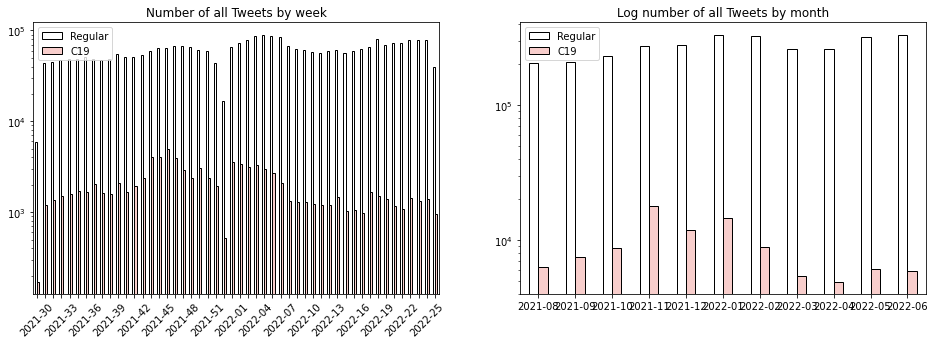

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
fig.set_facecolor('white')

tweets_df.groupby(['is_covid', 'week']).size().unstack('is_covid') \
    .plot.bar(
        title="Number of all Tweets by week", 
        rot=45,
        ax=ax[0],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[0].legend(['Regular', 'C19'])
ax[0].set_xlabel(None)
for i, t in enumerate(ax[0].get_xticklabels()):
    if (i % 3) != 0:
        t.set_visible(False)


tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        title="Log number of all Tweets by month", 
        rot=0,
        ax=ax[1],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[1].legend(['Regular', 'C19'])
ax[1].set_xlabel(None)

fig.savefig('tweets-by-month.eps', format='eps', dpi=320)
fig.savefig('tweets-by-month.png')

plt.show()


KeyError: 'week'

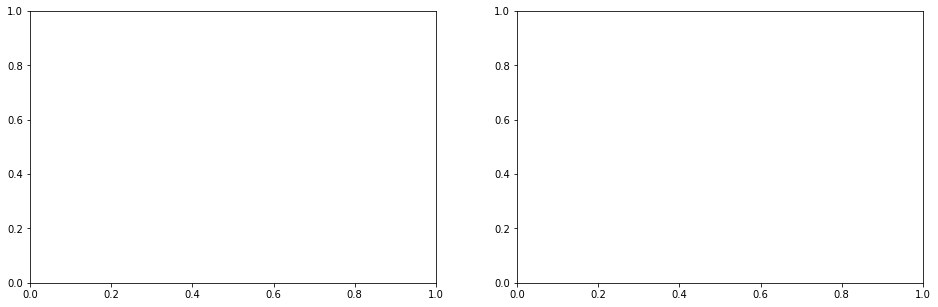

In [10]:


fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
fig.set_facecolor('white')

gdf = nodes_df.groupby(['is_covid', 'week']).size().unstack('week')
gdf[['is_covid']].plot(kind='bar', stacked=True)

plt1_df = tweets_df[tweets_df['is_covid'] == False].groupby(['is_covid', 'week']).size().reset_index(name='size')
ax[0].bar(tweets_df.index, plt1_df['size'], label='Non-Covid', log=True,
    title="Number of all Tweets by week", 
    rot=45,
    color=['#ffffff', '#f8cecc'],
    edgecolor='black'
)

ax[0].legend(['Regular', 'C19'])

ax[0].set_xlabel(None)
for i, t in enumerate(ax[0].get_xticklabels()):
    if (i % 3) != 0:
        t.set_visible(False)


tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        title="Log number of all Tweets by month", 
        rot=0,
        ax=ax[1],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[1].legend(['Regular', 'C19'])
ax[1].set_xlabel(None)

fig.savefig('tweets-by-month.eps', format='eps', dpi=320)
fig.savefig('tweets-by-month.png')

plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


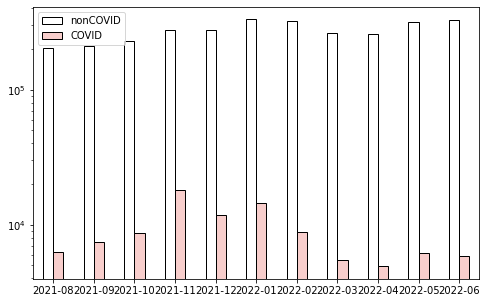

In [11]:
fig, ax = plt.subplots(1, figsize=(8, 5))
fig.set_facecolor('white')

tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        rot=0,
        ax=ax,
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax.legend(['nonCOVID', 'COVID'])
ax.set_xlabel(None)

fig.savefig('tweets-by-month.eps', dpi=320)
fig.savefig('tweets-by-month.png', dpi=320)

plt.show()

In [31]:
tweets_df.groupby(['week', 'is_covid']).size().unstack('is_covid')

is_covid,False,True
week,,
2021-30,224,10
2021-31,2114,84
2021-32,1991,79
2021-33,2146,109
2021-34,2109,107
2021-35,1944,113
2021-36,1939,91
2021-37,1886,136
2021-38,1810,93


In [37]:
tweets_df[tweets_df['is_covid'] == True]['full_text'].to_dict()

{159: 'radical-revolution:“There is a Tibetan saying: ‘When things are difficult, then let yourself be happy.’ Otherwise, if happiness is relying on others or the environment or your surroundings, it’s not possible. Like an ocean, the waves always go... https://t.co/LQ1u9znsM0',
 181: '📹 Jack Johnson - The 3 R’s (Unofficial Lyric Video) Good old song. They all talk about recycling, but this is the third step. First, we have to reduce our consumption. https://t.co/2CV9DUqmWb',
 355: 'Očito kasnim oko info o COVID-19.\nČitam da se pojavio novi oblik virusa-deltakron.',
 374: '@HamedBangoura Za koga je besplatno testiranje? Samo za ove koji rade u državnim službama?',
 378: '@capanigo @TelegramHR Raspad sistem je krenuo onog trena kad je Premijer slavodobitno rekao:"pobijedili smo COVID...!',
 380: 'RT @srdjl: Svakako da neću moći da zapamtim sve COVID pacijente koji su prošli kroz moju bolnicu ali jednog svakako neću zaboraviti. U pita…',
 393: '@Mathematicharka Besplatno testiranje u vr

In [42]:
b = 'radical-revolution:“There is a Tibetan saying: ‘When things are difficult, then let yourself be happy.’ Otherwise, if happiness is relying on others or the environment or your surroundings, it’s not possible. Like an ocean, the waves always go... https://t.co/LQ1u9znsM0'
a = '📹 Jack Johnson - The 3 R’s (Unofficial Lyric Video) Good old song. They all talk about recycling, but this is the third step. First, we have to reduce our consumption. https://t.co/2CV9DUqmWb'
any(tag in b for tag in settings.KEYWORDS['is_covid'])
for tag in settings.KEYWORDS['is_covid']:
    if tag in a:
        print(tag)